<a href="https://colab.research.google.com/github/raviakasapu/DeepLearningPyTorch/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

### https://www.learnpytorch.io/01_pytorch_workflow/

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

### data preparation and loading

In [ ]:
# using linear regression 
# parameters

weight = 0.7
bias = 0.3

start = 0
end = 1

step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

### train test split 80:20

In [ ]:
train_split = int(0.8 * len(X))
train_split

40

In [ ]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizations

In [ ]:
def plot_visualizations(train_data=X_train,
                        train_labels=y_train,
                        test_data=X_test,
                        test_labels=y_test,
                        predictions=None
                        ):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c="b",s=8, label="training data")
  plt.scatter(test_data, test_labels, c="g",s=4, label="testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r",s=4, label="Predictions data")
  plt.legend(prop={"size":14})

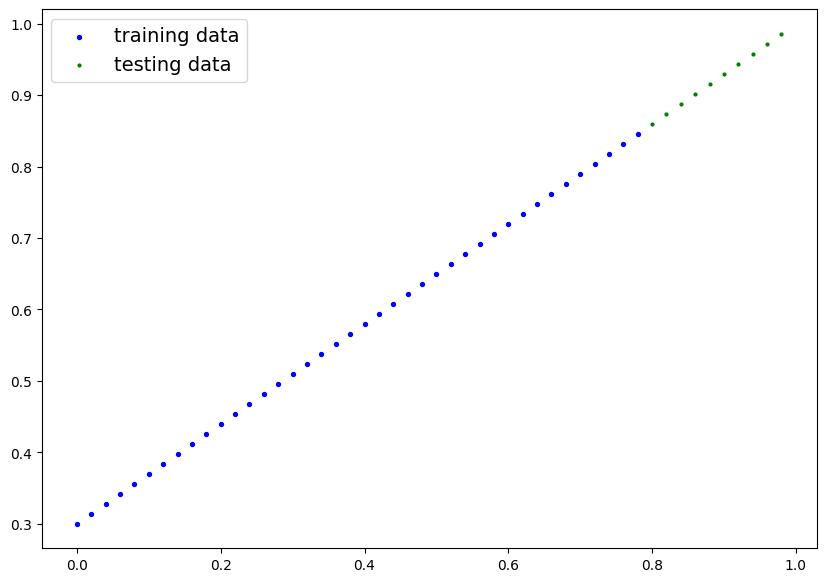

In [ ]:
plot_visualizations()

### Build Model

In [ ]:
# create a linear regression model class

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float)
    )
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float)
    )

  #forward method for computation
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [ ]:
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

model_0 = LinearRegressionModel()
model_0

LinearRegressionModel()

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#Making prediction using torch.inference_mode()

with torch.inference_mode():
  y_pred = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

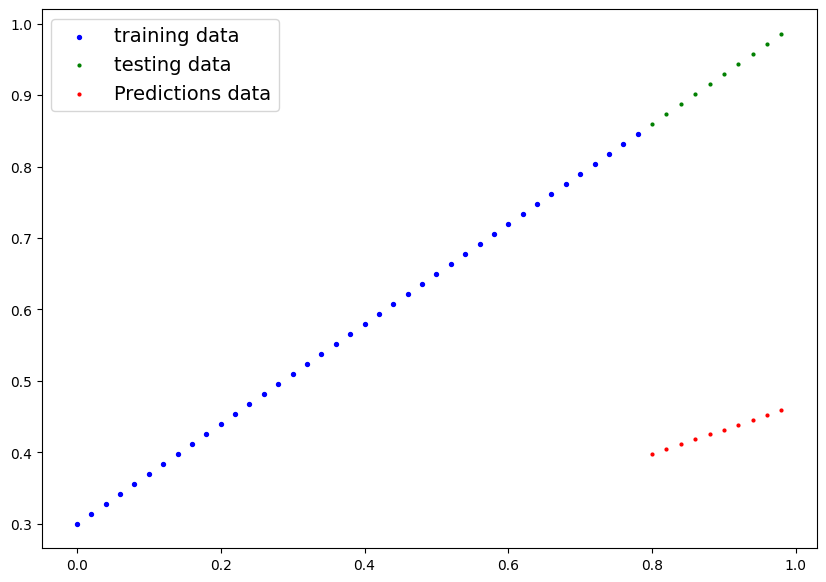

In [ ]:
plot_visualizations(predictions=y_pred)

In [ ]:
loss_fn = nn.L1Loss()

In [ ]:
learning_rate = 0.01
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=learning_rate)

### training loop & testing loop